In [2]:
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
from tqdm import tqdm
from scipy.stats import shapiro, normaltest
from statsmodels.stats.proportion import proportion_confint

In [23]:
def generate_uniform(N):
    a = np.sqrt(3)
    return np.random.uniform(-a, a, N)

def generate_normal(N):
    return np.random.normal(0, 1, N)

def generate_exp(N):
    return np.random.exponential(1, N) - 1

def generate_laplace(N):
    target_std = 0.05
    lambda_param = np.sqrt(2) / target_std
    scale = 1 / lambda_param
    return np.random.laplace(loc=0, scale=scale, size=N)

def generate_cauchy(N):
    return np.random.standard_cauchy(size=N)

def generate_beta(N):
    alpha, beta = 2, 5
    return np.random.beta(alpha, beta, size=N) - 0.5

# 1-4

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:14<00:00,  2.44s/it]


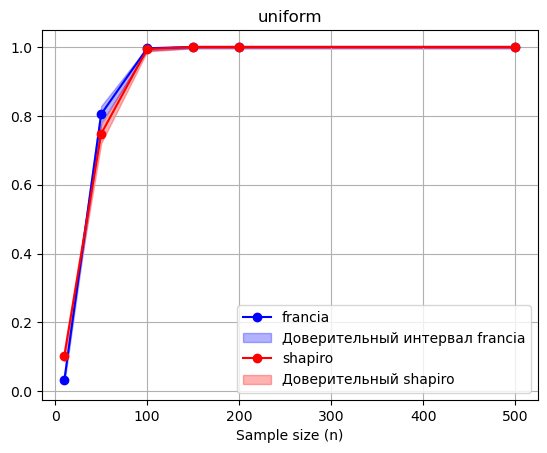

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.54s/it]


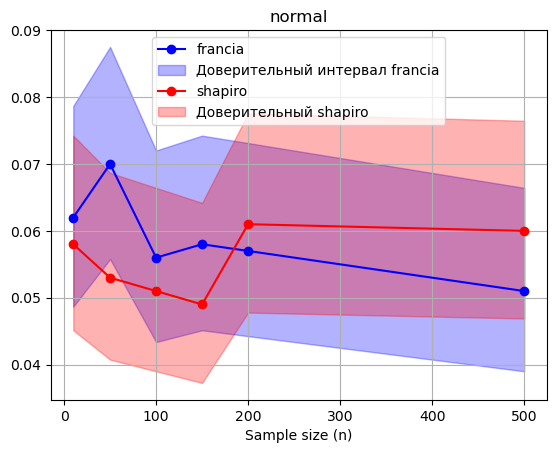

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.63s/it]


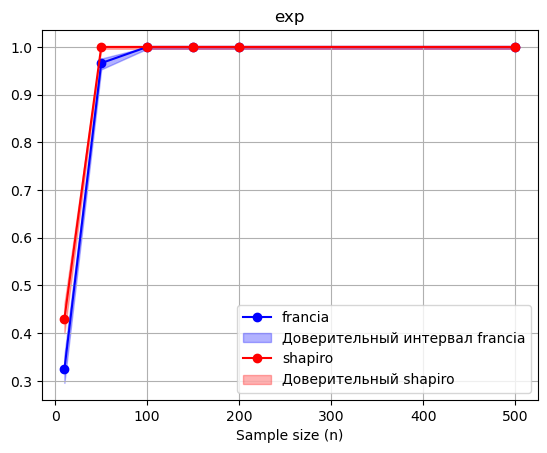

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:13<00:00,  2.31s/it]


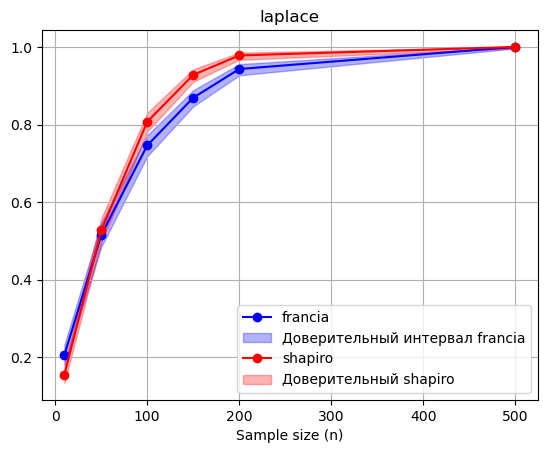

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:14<00:00,  2.48s/it]


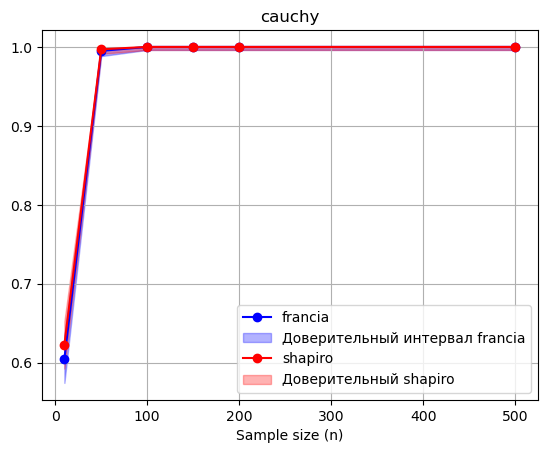

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:16<00:00,  2.69s/it]


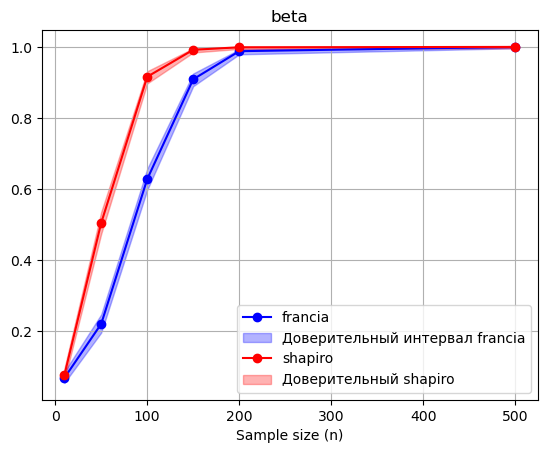

In [30]:
n_values = [10, 50, 100, 150, 200, 500]
alpha = 0.05

for dist in [generate_uniform, generate_normal, generate_exp, generate_laplace, generate_cauchy, generate_beta]:
    list_rejections_francia = []
    list_rejections_shapiro = []
    l_francia, r_francia, l_shapiro, r_shapiro = [], [], [], []
    for n in tqdm(n_values):
        rejections_francia = 0
        rejections_shapiro = 0
        for _ in range(1000):
            data = dist(n)
            _, p_value_shapiro = shapiro(data)
            _, p_value_francia = normaltest(data)
            if p_value_francia < 0.05:
                rejections_francia += 1
            if p_value_shapiro < 0.05:
                rejections_shapiro += 1
        list_rejections_francia.append(rejections_francia / 1000)
        list_rejections_shapiro.append(rejections_shapiro / 1000)
        
        l_fr, r_fr = proportion_confint(rejections_francia, 1000, alpha=alpha, method='wilson')
        l_sh, r_sh = proportion_confint(rejections_shapiro, 1000, alpha=alpha, method='wilson')
        l_francia.append(l_fr)
        r_francia.append(r_fr)
        l_shapiro.append(l_sh)
        r_shapiro.append(r_sh)
        
    plt.title(f"{dist.__name__.split('_')[1]}")
    plt.plot(n_values, list_rejections_francia, label = "francia", marker='o', color="blue")
    plt.fill_between(n_values, l_francia, r_francia, color="blue", alpha=0.3, label="Доверительный интервал francia")
    plt.plot(n_values, list_rejections_shapiro, label = "shapiro", marker='o', color="red")
    plt.fill_between(n_values, l_shapiro, r_shapiro, color="red", alpha=0.3, label="Доверительный shapiro")
    plt.xlabel('Sample size (n)')
    plt.grid()
    plt.legend()
    plt.show()

# 5

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.57s/it]


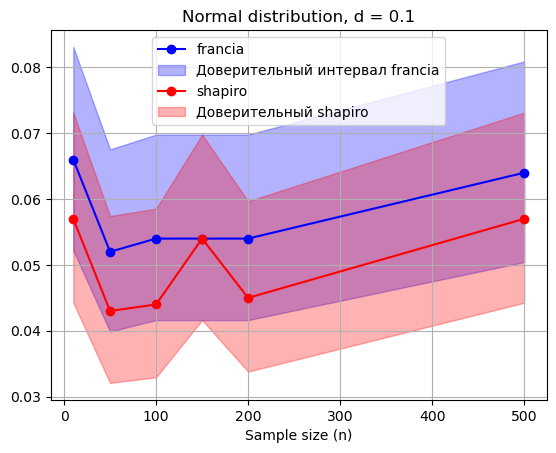

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:14<00:00,  2.39s/it]


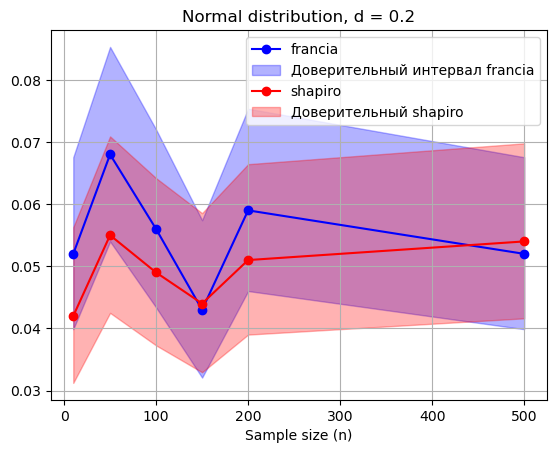

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:14<00:00,  2.42s/it]


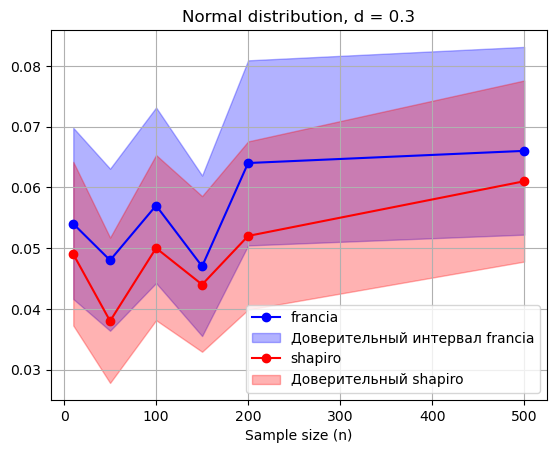

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:14<00:00,  2.41s/it]


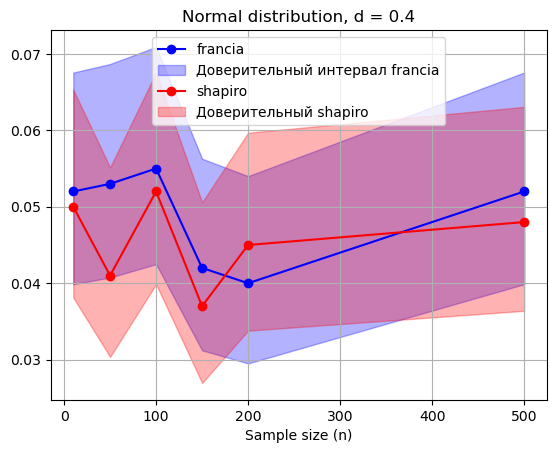

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:16<00:00,  2.71s/it]


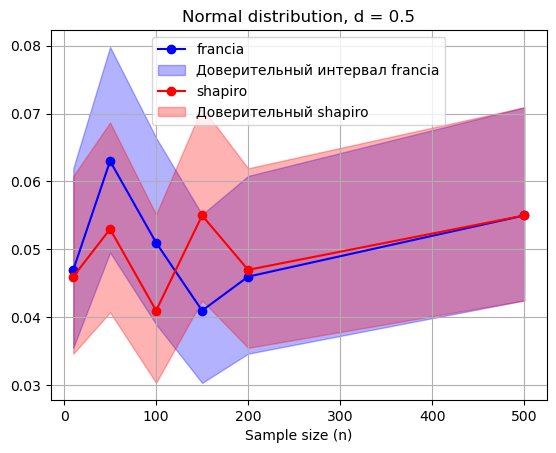

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.51s/it]


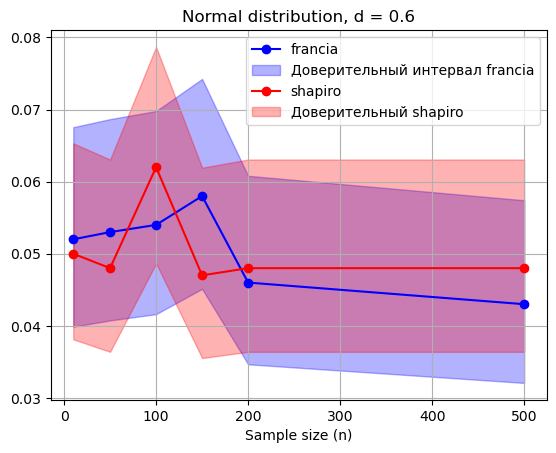

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:14<00:00,  2.42s/it]


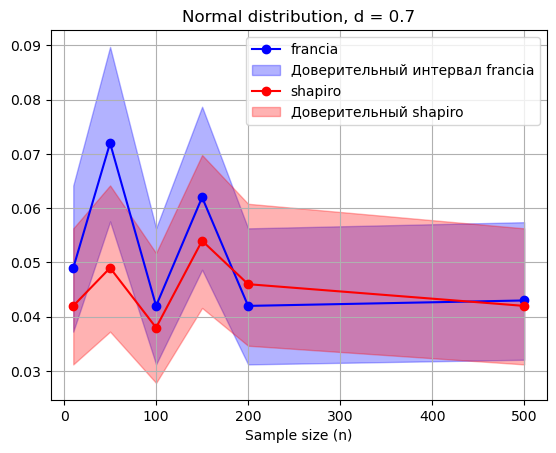

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:14<00:00,  2.49s/it]


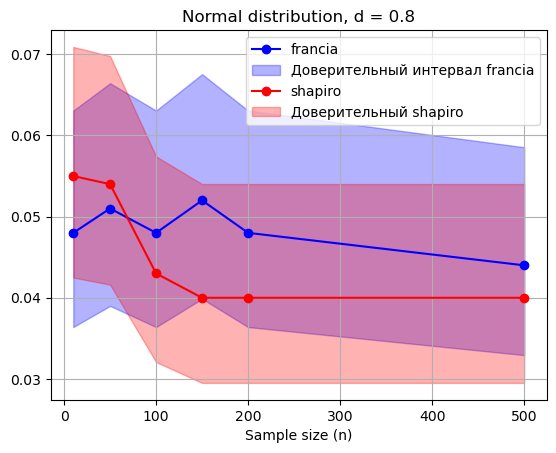

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:16<00:00,  2.77s/it]


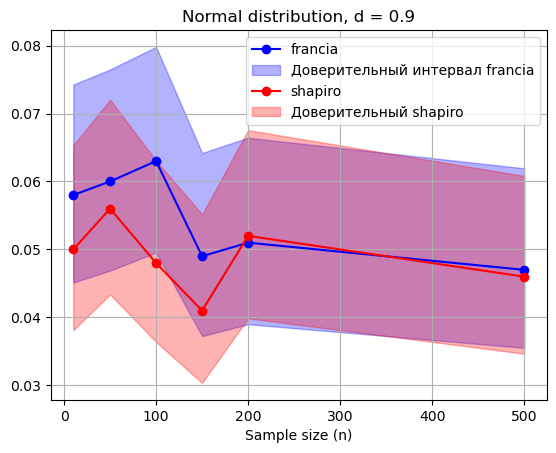

In [33]:
n_values = [10, 50, 100, 150, 200, 500]
alpha = 0.05
d_values = [i / 10 for i in range(1, 11)]

for d in d_values:
    list_rejections_francia = []
    list_rejections_shapiro = []
    l_francia, r_francia, l_shapiro, r_shapiro = [], [], [], []
    for n in tqdm(n_values):
        rejections_francia = 0
        rejections_shapiro = 0
        for _ in range(1000):
            data = generate_normal(n) + np.random.uniform(-d, d, n)
            _, p_value_shapiro = shapiro(data)
            _, p_value_francia = normaltest(data)
            if p_value_francia < 0.05:
                rejections_francia += 1
            if p_value_shapiro < 0.05:
                rejections_shapiro += 1
        list_rejections_francia.append(rejections_francia / 1000)
        list_rejections_shapiro.append(rejections_shapiro / 1000)
        
        l_fr, r_fr = proportion_confint(rejections_francia, 1000, alpha=alpha, method='wilson')
        l_sh, r_sh = proportion_confint(rejections_shapiro, 1000, alpha=alpha, method='wilson')
        l_francia.append(l_fr)
        r_francia.append(r_fr)
        l_shapiro.append(l_sh)
        r_shapiro.append(r_sh)
        
    plt.title(f"Normal distribution, d = {d}")
    plt.plot(n_values, list_rejections_francia, label = "francia", marker='o', color="blue")
    plt.fill_between(n_values, l_francia, r_francia, color="blue", alpha=0.3, label="Доверительный интервал francia")
    plt.plot(n_values, list_rejections_shapiro, label = "shapiro", marker='o', color="red")
    plt.fill_between(n_values, l_shapiro, r_shapiro, color="red", alpha=0.3, label="Доверительный shapiro")
    plt.xlabel('Sample size (n)')
    plt.grid()
    plt.legend()
    plt.show()

  0%|                                                                                             | 0/6 [00:00<?, ?it/s]/home/nixiiee/miniconda3/envs/statistics/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)
100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:16<00:00,  2.72s/it]


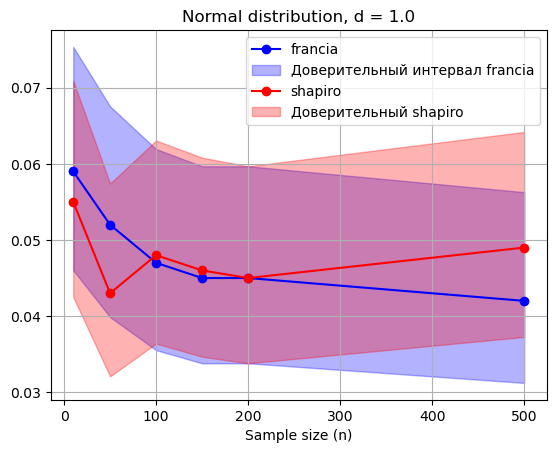

In [34]:
d = 1.0

list_rejections_francia = []
list_rejections_shapiro = []
l_francia, r_francia, l_shapiro, r_shapiro = [], [], [], []
for n in tqdm(n_values):
    rejections_francia = 0
    rejections_shapiro = 0
    for _ in range(1000):
        data = generate_normal(n) + np.random.uniform(-d, d, n)
        _, p_value_shapiro = shapiro(data)
        _, p_value_francia = normaltest(data)
        if p_value_francia < 0.05:
            rejections_francia += 1
        if p_value_shapiro < 0.05:
            rejections_shapiro += 1
    list_rejections_francia.append(rejections_francia / 1000)
    list_rejections_shapiro.append(rejections_shapiro / 1000)
    
    l_fr, r_fr = proportion_confint(rejections_francia, 1000, alpha=alpha, method='wilson')
    l_sh, r_sh = proportion_confint(rejections_shapiro, 1000, alpha=alpha, method='wilson')
    l_francia.append(l_fr)
    r_francia.append(r_fr)
    l_shapiro.append(l_sh)
    r_shapiro.append(r_sh)
    
plt.title(f"Normal distribution, d = {d}")
plt.plot(n_values, list_rejections_francia, label = "francia", marker='o', color="blue")
plt.fill_between(n_values, l_francia, r_francia, color="blue", alpha=0.3, label="Доверительный интервал francia")
plt.plot(n_values, list_rejections_shapiro, label = "shapiro", marker='o', color="red")
plt.fill_between(n_values, l_shapiro, r_shapiro, color="red", alpha=0.3, label="Доверительный shapiro")
plt.xlabel('Sample size (n)')
plt.grid()
plt.legend()
plt.show()

# дз

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.60s/it]


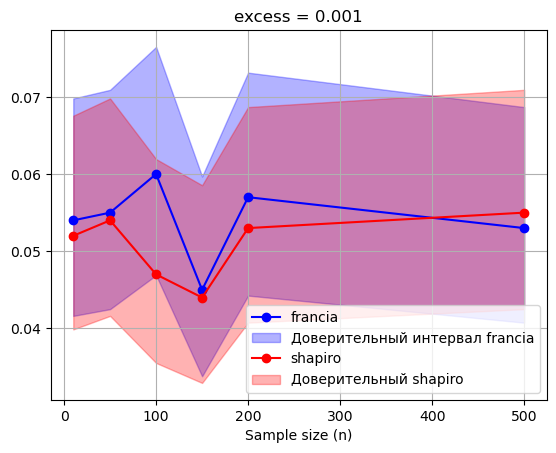

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:14<00:00,  2.46s/it]


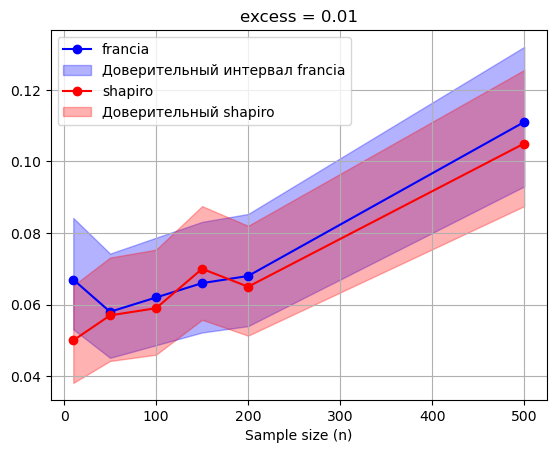

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.56s/it]


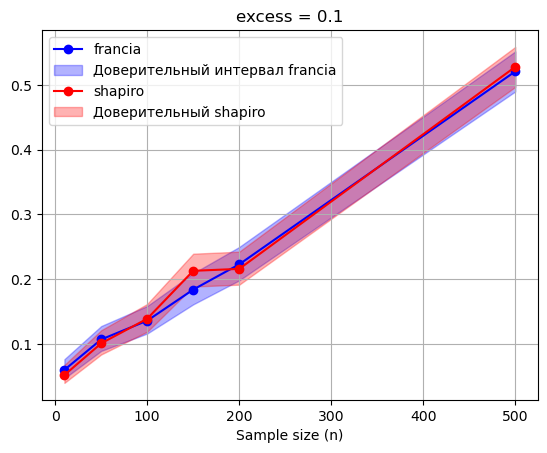

100%|█████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:14<00:00,  2.44s/it]


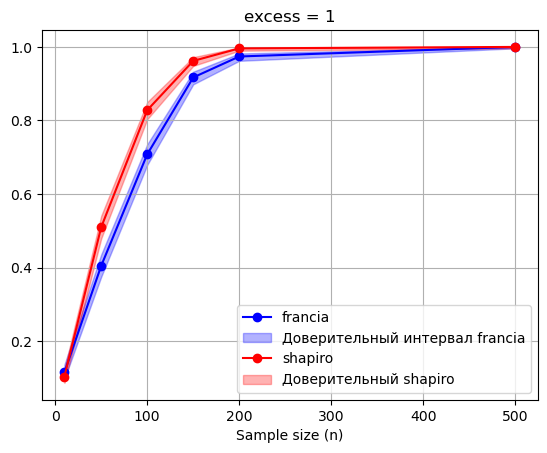

In [8]:
def generate_excess_gamma(N, excess):
    """
    Генерация данных с заданным эксцессом (гамма-распределение).
    Коэффициент эксцесса: 6 / shape
    """
    shape = 6 / excess 
    scale = 1 / np.sqrt(shape)  # Масштабируем для стандартного отклонения 1
    return np.random.gamma(shape, scale=scale, size=N) - shape

n_values = [10, 50, 100, 150, 200, 500]
alpha = 0.05

for excess in [0.001, 0.01, 0.1, 1]:
    list_rejections_francia = []
    list_rejections_shapiro = []
    l_francia, r_francia, l_shapiro, r_shapiro = [], [], [], []
    for n in tqdm(n_values):
        rejections_francia = 0
        rejections_shapiro = 0
        for _ in range(1000):
            data = generate_excess_gamma(n, excess)
            _, p_value_shapiro = shapiro(data)
            _, p_value_francia = normaltest(data)
            if p_value_francia < 0.05:
                rejections_francia += 1
            if p_value_shapiro < 0.05:
                rejections_shapiro += 1
        list_rejections_francia.append(rejections_francia / 1000)
        list_rejections_shapiro.append(rejections_shapiro / 1000)
        
        l_fr, r_fr = proportion_confint(rejections_francia, 1000, alpha=alpha, method='wilson')
        l_sh, r_sh = proportion_confint(rejections_shapiro, 1000, alpha=alpha, method='wilson')
        l_francia.append(l_fr)
        r_francia.append(r_fr)
        l_shapiro.append(l_sh)
        r_shapiro.append(r_sh)
        
    plt.title(f"excess = {excess}")
    plt.plot(n_values, list_rejections_francia, label = "francia", marker='o', color="blue")
    plt.fill_between(n_values, l_francia, r_francia, color="blue", alpha=0.3, label="Доверительный интервал francia")
    plt.plot(n_values, list_rejections_shapiro, label = "shapiro", marker='o', color="red")
    plt.fill_between(n_values, l_shapiro, r_shapiro, color="red", alpha=0.3, label="Доверительный shapiro")
    plt.xlabel('Sample size (n)')
    plt.grid()
    plt.legend()
    plt.show()

По этим графикам, а также по графикам в прошлых заданиях (бета распределение, гамма распределение) можно сделать вывод, что лучше использовать тест Шапиро-Франция при больших значения коэффициента эксцесса (от 0.1), а при маленьких (до 0.1) лучше использовать Шапиро-Уилко. 